<h1>  Physics, Chemistry, Biology classification<h1>

<img src='https://ih1.redbubble.net/image.567634194.6844/flat,750x,075,f-pad,750x1000,f8f8f8.u9.jpg' width= '800' align='center'>

### Author: Lukbek Elubai, ID: 190103201

#### In this project I used data from Kaggle
**In database we have two parts, train set and test set. Database have 10000 examples. I'm trying create good model for prediction text type using our data and some packages. I'm also learning NLP in this semester, and I specially choose this database for checking my knowledge.**

**Link to data: https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology**

## 1. Preprocessing data 
#### Import libraries 

In [90]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [91]:
data = pd.read_csv('train.csv')
data

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [92]:
test_data = pd.read_csv('test.csv')
test_data

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


In [93]:
# Chech for null
data.isnull().sum()

Id         0
Comment    0
Topic      0
dtype: int64

In [94]:
test_data.isnull().sum()

Id         0
Comment    0
Topic      0
dtype: int64

In [95]:
data_copy = data.copy()
test_data_copy = test_data.copy()
data_copy

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


<AxesSubplot:xlabel='count', ylabel='Topic'>

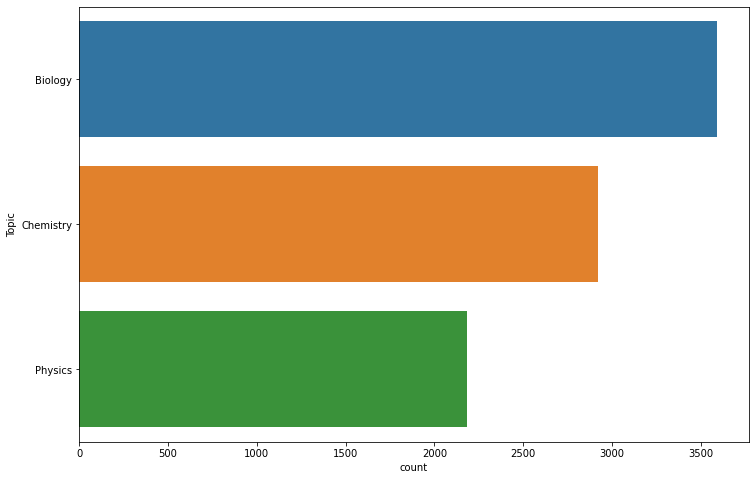

In [96]:
# Count and show text type 
plt.figure(figsize = (12,8))
sns.countplot(y=data_copy.Topic,data = data_copy,order = data_copy.Topic.value_counts().index)

In [97]:
def remove_emojis(data):
    """removing emojis"""
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

# Applying function for data
data_copy['No_Emoji'] = data_copy['Comment'].apply(lambda x: remove_emojis(x))
test_data_copy['No_Emoji'] = test_data_copy['Comment'].apply(lambda x: remove_emojis(x))

data_copy.head()

,Id,Comment,Topic,No_Emoji
0,0x840,A few things. You might have negative- frequen...,Biology,A few things. You might have negative- frequen...
1,0xbf0,Is it so hard to believe that there exist part...,Physics,Is it so hard to believe that there exist part...
2,0x1dfc,There are bees,Biology,There are bees
3,0xc7e,I'm a medication technician. And that's alot o...,Biology,I'm a medication technician. And that's alot o...
4,0xbba,Cesium is such a pretty metal.,Chemistry,Cesium is such a pretty metal.


In [98]:
# Show text for finding another issues and wrong data
data_copy['No_Emoji'].to_list()

['A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food.  So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey. This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed. This cycle continues perpetually. \\n\\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness. \\n\\nMore likely on a *year to year* basis, the population is experiencing fluctuating selection where 

In [99]:
def clean_text(text):
    """Cleaning text from wrong data"""
    
    text = text.lower()
    
    #pattern = [zero or more character]
    text = re.sub('\[.*?\]', '', text)
    
    #pattern = with or without(http),://, one or more non-white space character, OR www, .,one or more non-white space character
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    #pattern = <, zero or more characters, >, (one or more occurance of >)
    text = re.sub('<.*?>+', '', text)
    
    #pattern = any punctionation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    #pattern = any new line
    text = re.sub('\n', '', text)
    
    #pattern = any from[a-zA-Z0-9_], any from[0-9], any from [a-zA-Z0-9_]
    text = re.sub('\w*\d\w*', '', text)
    return text

In [100]:
data_copy['Clean_text'] = data_copy['No_Emoji'].apply(lambda x: clean_text(x))
test_data_copy['Clean_text'] = test_data_copy['No_Emoji'].apply(lambda x: clean_text(x))

In [101]:
# Checking second time
data_copy['Clean_text'].to_list()

['a few things you might have negative frequency dependent selection going on where the least common phenotype reflected by genotype is going to have an advantage in the environment for instance if a prey animal such as a vole were to have a light and a dark phenotype a predator might recognize the more common phenotype as food  so if the light voles are more common foxes may be keeping a closer eye out for light phenotypic voles recognising them as good prey this would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed this cycle continues perpetually nnhowever this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness nnmore likely on a year to year basis the population is experiencing fluctuating selection where alternating conditions in 

## Tokenization

In [102]:
tokenization = nltk.tokenize.RegexpTokenizer(r'\w+')
data_copy['clean_text_token'] = data_copy['Clean_text'].apply(lambda x: tokenization.tokenize(x))
test_data_copy['clean_text_token'] = test_data_copy['Clean_text'].apply(lambda x: tokenization.tokenize(x))
data_copy['clean_text_token']

0       [a, few, things, you, might, have, negative, f...
1       [is, it, so, hard, to, believe, that, there, e...
2                                      [there, are, bees]
3       [im, a, medication, technician, and, thats, al...
4                    [cesium, is, such, a, pretty, metal]
                              ...                        
8690    [i, make, similar, observations, over, the, la...
8691                                   [you, would, know]
8692     [also, use, the, correct, number, of, sig, figs]
8693    [what, about, the, ethical, delimmas, groundbr...
8694                      [i, would, like, to, know, too]
Name: clean_text_token, Length: 8695, dtype: object

## Stop words

In [103]:
stop_words = set(stopwords.words('english'))
def removing_stopwords(token):
    return [w for w in token if not w.lower() in stop_words]

In [104]:
data_copy['clean_text_stop'] = data_copy['clean_text_token'].apply(lambda x : removing_stopwords(x))
test_data_copy['clean_text_stop'] = test_data_copy['clean_text_token'].apply(lambda x : removing_stopwords(x))
data_copy.head()

,Id,Comment,Topic,No_Emoji,Clean_text,clean_text_token,clean_text_stop
0,0x840,A few things. You might have negative- frequen...,Biology,A few things. You might have negative- frequen...,a few things you might have negative frequency...,"[a, few, things, you, might, have, negative, f...","[things, might, negative, frequency, dependent..."
1,0xbf0,Is it so hard to believe that there exist part...,Physics,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,"[is, it, so, hard, to, believe, that, there, e...","[hard, believe, exist, particulars, cant, dete..."
2,0x1dfc,There are bees,Biology,There are bees,there are bees,"[there, are, bees]",[bees]
3,0xc7e,I'm a medication technician. And that's alot o...,Biology,I'm a medication technician. And that's alot o...,im a medication technician and thats alot of d...,"[im, a, medication, technician, and, thats, al...","[im, medication, technician, thats, alot, drug..."
4,0xbba,Cesium is such a pretty metal.,Chemistry,Cesium is such a pretty metal.,cesium is such a pretty metal,"[cesium, is, such, a, pretty, metal]","[cesium, pretty, metal]"


## Lematization

In [105]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_word(tokenization):
    return [wordnet_lemmatizer.lemmatize(token, pos="v") for token in tokenization]

In [106]:
data_copy['Text_Lemmatization'] = data_copy['clean_text_stop'].apply(lambda x : lemmatize_word(x))
test_data_copy['Text_Lemmatization'] = test_data_copy['clean_text_stop'].apply(lambda x : lemmatize_word(x))
data_copy['Text_Lemmatization']

0       [things, might, negative, frequency, dependent...
1       [hard, believe, exist, particulars, cant, dete...
2                                                    [be]
3       [im, medication, technician, thats, alot, drug...
4                                 [cesium, pretty, metal]
                              ...                        
8690    [make, similar, observations, last, weeks, sou...
8691                                        [would, know]
8692              [also, use, correct, number, sig, figs]
8693    [ethical, delimmas, groundbreaking, technology...
8694                                  [would, like, know]
Name: Text_Lemmatization, Length: 8695, dtype: object

In [107]:
data_copy.head()

,Id,Comment,Topic,No_Emoji,Clean_text,clean_text_token,clean_text_stop,Text_Lemmatization
0,0x840,A few things. You might have negative- frequen...,Biology,A few things. You might have negative- frequen...,a few things you might have negative frequency...,"[a, few, things, you, might, have, negative, f...","[things, might, negative, frequency, dependent...","[things, might, negative, frequency, dependent..."
1,0xbf0,Is it so hard to believe that there exist part...,Physics,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,"[is, it, so, hard, to, believe, that, there, e...","[hard, believe, exist, particulars, cant, dete...","[hard, believe, exist, particulars, cant, dete..."
2,0x1dfc,There are bees,Biology,There are bees,there are bees,"[there, are, bees]",[bees],[be]
3,0xc7e,I'm a medication technician. And that's alot o...,Biology,I'm a medication technician. And that's alot o...,im a medication technician and thats alot of d...,"[im, a, medication, technician, and, thats, al...","[im, medication, technician, thats, alot, drug...","[im, medication, technician, thats, alot, drug..."
4,0xbba,Cesium is such a pretty metal.,Chemistry,Cesium is such a pretty metal.,cesium is such a pretty metal,"[cesium, is, such, a, pretty, metal]","[cesium, pretty, metal]","[cesium, pretty, metal]"


In [108]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

data_copy['Final_text'] = data_copy['Text_Lemmatization'].apply(lambda x : combine_text(x))
test_data_copy['Final_text'] = test_data_copy['Text_Lemmatization'].apply(lambda x : combine_text(x))

data_copy.head()

,Id,Comment,Topic,No_Emoji,Clean_text,clean_text_token,clean_text_stop,Text_Lemmatization,Final_text
0,0x840,A few things. You might have negative- frequen...,Biology,A few things. You might have negative- frequen...,a few things you might have negative frequency...,"[a, few, things, you, might, have, negative, f...","[things, might, negative, frequency, dependent...","[things, might, negative, frequency, dependent...",things might negative frequency dependent sele...
1,0xbf0,Is it so hard to believe that there exist part...,Physics,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,"[is, it, so, hard, to, believe, that, there, e...","[hard, believe, exist, particulars, cant, dete...","[hard, believe, exist, particulars, cant, dete...",hard believe exist particulars cant detect any...
2,0x1dfc,There are bees,Biology,There are bees,there are bees,"[there, are, bees]",[bees],[be],be
3,0xc7e,I'm a medication technician. And that's alot o...,Biology,I'm a medication technician. And that's alot o...,im a medication technician and thats alot of d...,"[im, a, medication, technician, and, thats, al...","[im, medication, technician, thats, alot, drug...","[im, medication, technician, thats, alot, drug...",im medication technician thats alot drug liver...
4,0xbba,Cesium is such a pretty metal.,Chemistry,Cesium is such a pretty metal.,cesium is such a pretty metal,"[cesium, is, such, a, pretty, metal]","[cesium, pretty, metal]","[cesium, pretty, metal]",cesium pretty metal


In [109]:
Final_data = data_copy[['Final_text', 'Topic']].copy()
Final_data_test = test_data_copy[['Final_text', 'Topic']].copy()
Final_data

,Final_text,Topic
0,things might negative frequency dependent sele...,Biology
1,hard believe exist particulars cant detect any...,Physics
2,be,Biology
3,im medication technician thats alot drug liver...,Biology
4,cesium pretty metal,Chemistry
...,...,...
8690,make similar observations last weeks southern ...,Biology
8691,would know,Biology
8692,also use correct number sig figs,Chemistry
8693,ethical delimmas groundbreaking technology fut...,Biology


In [110]:
Final_data_test

,Final_text,Topic
0,personally idea iq never test however test out...,Biology
1,im skeptical heavier lid would need build pres...,Physics
2,think cm book subject tldr problem consciousne...,Biology
3,chemistry hard uni ive read somewhere hardest ...,Chemistry
4,addition comment criticize theory without chec...,Physics
...,...,...
1581,really deny intent doubt third comment indicat...,Chemistry
1582,really empathize compassion bug entomology rea...,Biology
1583,want keep weeks would go something like l also...,Chemistry
1584,nurse school basic understand things like see ...,Biology


In [111]:
full_data = pd.concat([Final_data, Final_data_test]).reset_index()
full_data

,index,Final_text,Topic
0,0,things might negative frequency dependent sele...,Biology
1,1,hard believe exist particulars cant detect any...,Physics
2,2,be,Biology
3,3,im medication technician thats alot drug liver...,Biology
4,4,cesium pretty metal,Chemistry
...,...,...,...
10276,1581,really deny intent doubt third comment indicat...,Chemistry
10277,1582,really empathize compassion bug entomology rea...,Biology
10278,1583,want keep weeks would go something like l also...,Chemistry
10279,1584,nurse school basic understand things like see ...,Biology


## 2. Create model

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [31]:
x_train, x_test, y_train, y_test = train_test_split(full_data['Final_text'], full_data['Topic'], test_size=0.2, random_state=42)

### Create several simple model

#### TfidfVectorizer and Logistic Regression

In [35]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer()),('lr',LogisticRegression(max_iter=1000))])

In [36]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', TfidfVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [37]:
pipe_lr.score(x_test,y_test)

0.7277588721438989

#### CountVectorizer and Logistic Regression

In [38]:
pipe_lr_CountVect = Pipeline(steps=[('cv', CountVectorizer()),('lr',LogisticRegression(C=1,penalty="l2", max_iter=1000))])

In [39]:
pipe_lr_CountVect.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(C=1, max_iter=1000))])

In [41]:
pipe_lr_CountVect.score(x_test,y_test)

0.7170636849781235

**Simple example**

In [42]:
ex1 = "all organisms are made up of cells that process hereditary"
ex2 = "behavior through space and time, and the related entities of energy"
ex3 = "how medications work"

In [43]:
pipe_lr.predict([ex1])

array(['Biology'], dtype=object)

In [44]:
pipe_lr.predict([ex2])

array(['Physics'], dtype=object)

In [45]:
pipe_lr.predict([ex3])

array(['Chemistry'], dtype=object)

In [47]:
pipe_lr_CountVect.predict([ex3])

array(['Chemistry'], dtype=object)

## Create updated model

In [112]:
from sklearn.preprocessing import LabelEncoder
# decoding topic labels
enc = LabelEncoder()
Y = enc.fit_transform(full_data['Topic'])

In [50]:
def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='char_wb',ngram_range=(4,7),stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', model),])
    text_clf.fit(data, targets)
    return text_clf
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy
def get_report(trained_model,X, y):
    plt.figure(figsize=(10,10))
    predicted = trained_model.predict(X)
    cr = classification_report(y,predicted,target_names=enc.classes_)
    cm = confusion_matrix(y,predicted)
    df_cm = pd.DataFrame(cm,index=enc.classes_)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g') # font size
    plt.show()
    print(cr)

## Logistic Regression

Test dataset accuracy with LogisticRegression: 0.74


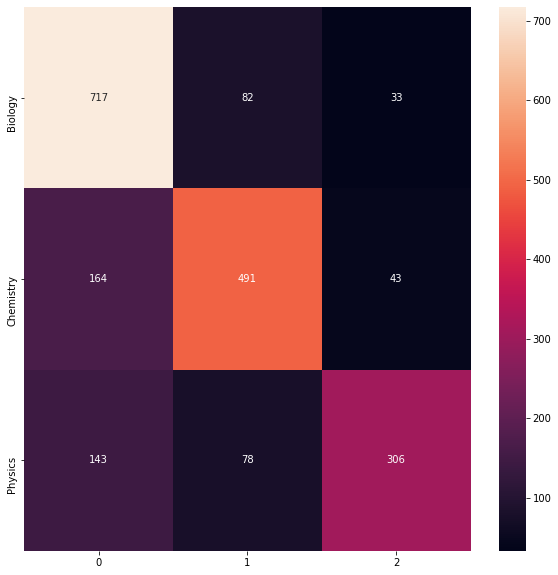

              precision    recall  f1-score   support

     Biology       0.70      0.86      0.77       832
   Chemistry       0.75      0.70      0.73       698
     Physics       0.80      0.58      0.67       527

    accuracy                           0.74      2057
   macro avg       0.75      0.72      0.72      2057
weighted avg       0.74      0.74      0.73      2057



In [51]:
trained_clf_LogisticRegression = train_model(LogisticRegression(max_iter=1000), x_train, y_train)
accuracy = get_accuracy(trained_clf_LogisticRegression,x_test, y_test)
print(f"Test dataset accuracy with LogisticRegression: {accuracy:.2f}")
get_report(trained_clf_LogisticRegression,x_test, y_test)

## SVM

Test dataset accuracy with LinearSVC: 0.75


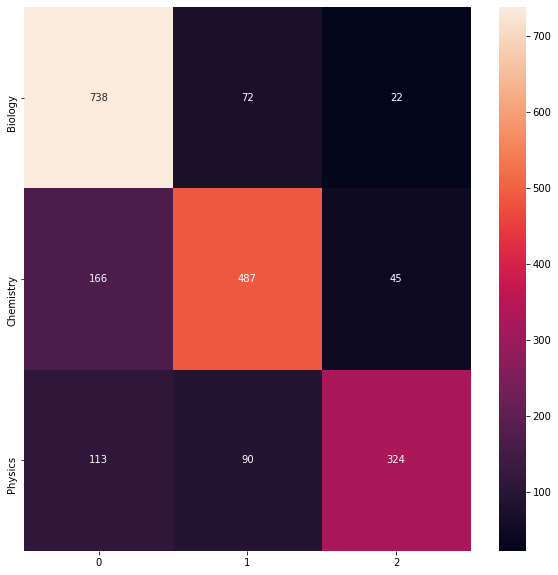

              precision    recall  f1-score   support

     Biology       0.73      0.89      0.80       832
   Chemistry       0.75      0.70      0.72       698
     Physics       0.83      0.61      0.71       527

    accuracy                           0.75      2057
   macro avg       0.77      0.73      0.74      2057
weighted avg       0.76      0.75      0.75      2057



In [52]:
from sklearn.svm import SVC
trained_clf_linearSVC = train_model(SVC(), x_train, y_train)
accuracy = get_accuracy(trained_clf_linearSVC, x_test, y_test)
print(f"Test dataset accuracy with LinearSVC: {accuracy:.2f}")
get_report(trained_clf_linearSVC, x_test, y_test)

## MLP

Iteration 1, loss = 0.93256285
Iteration 2, loss = 0.55035293
Iteration 3, loss = 0.36016709
Iteration 4, loss = 0.26537204
Iteration 5, loss = 0.21097439


c:\users\пользователь\pycharmprojects\selenium_project\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Test dataset accuracy with MLPClassifier: 0.76


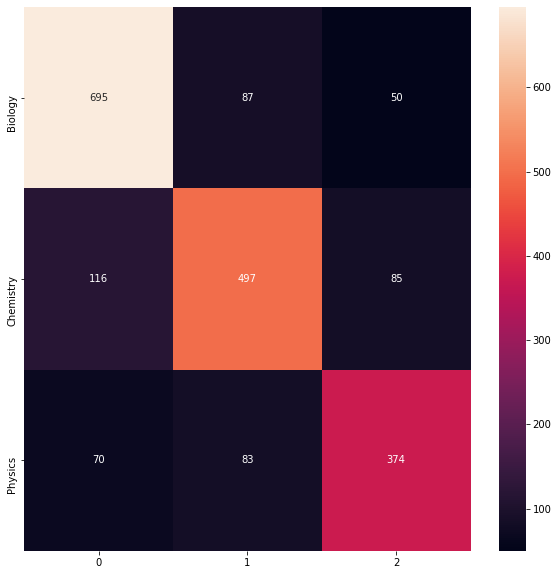

              precision    recall  f1-score   support

     Biology       0.79      0.84      0.81       832
   Chemistry       0.75      0.71      0.73       698
     Physics       0.73      0.71      0.72       527

    accuracy                           0.76      2057
   macro avg       0.76      0.75      0.75      2057
weighted avg       0.76      0.76      0.76      2057



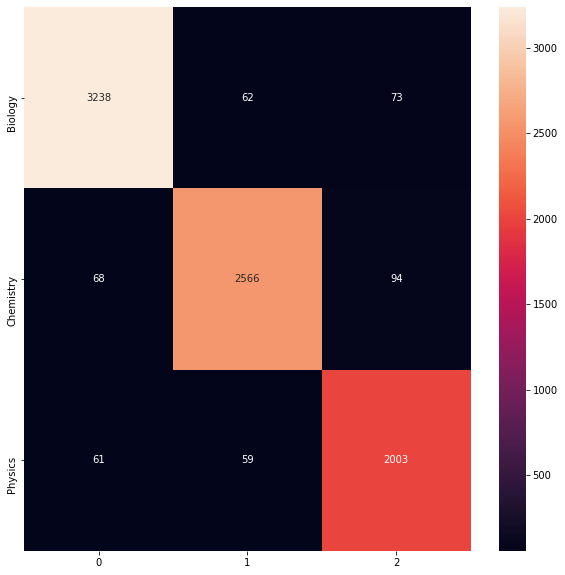

              precision    recall  f1-score   support

     Biology       0.96      0.96      0.96      3373
   Chemistry       0.95      0.94      0.95      2728
     Physics       0.92      0.94      0.93      2123

    accuracy                           0.95      8224
   macro avg       0.95      0.95      0.95      8224
weighted avg       0.95      0.95      0.95      8224



In [53]:
from sklearn.neural_network import MLPClassifier
trained_clf_MLPClassifier = train_model(MLPClassifier(verbose=1,max_iter=5,validation_fraction=0.1), x_train, y_train)
accuracy = get_accuracy(trained_clf_MLPClassifier,x_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_MLPClassifier,x_test, y_test)
get_report(trained_clf_MLPClassifier,x_train, y_train)

## Decision Tree

Test dataset accuracy with MLPClassifier: 0.64


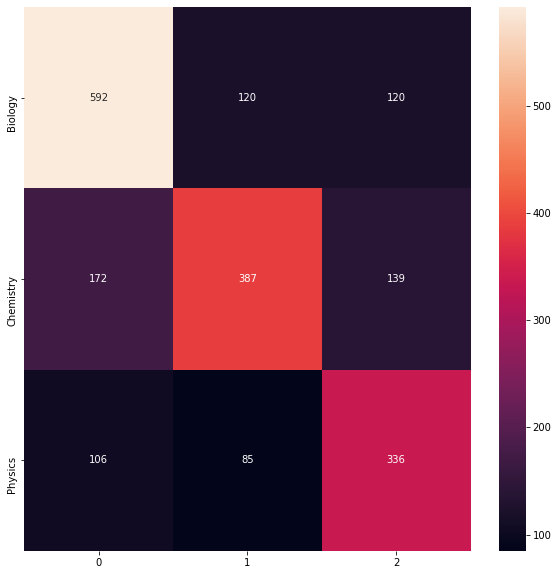

              precision    recall  f1-score   support

     Biology       0.68      0.71      0.70       832
   Chemistry       0.65      0.55      0.60       698
     Physics       0.56      0.64      0.60       527

    accuracy                           0.64      2057
   macro avg       0.63      0.63      0.63      2057
weighted avg       0.64      0.64      0.64      2057



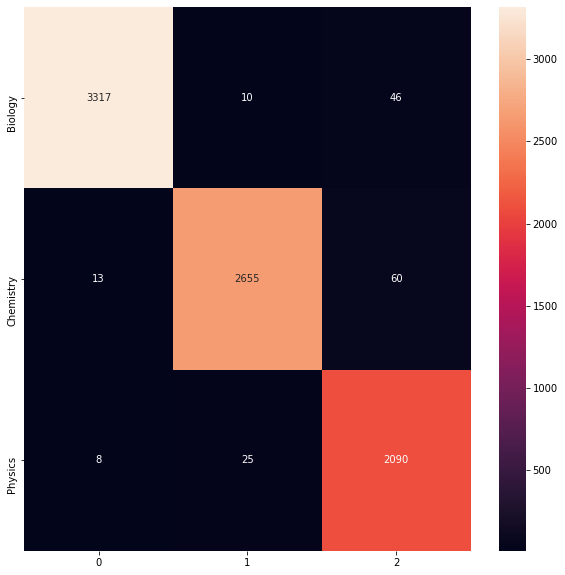

              precision    recall  f1-score   support

     Biology       0.99      0.98      0.99      3373
   Chemistry       0.99      0.97      0.98      2728
     Physics       0.95      0.98      0.97      2123

    accuracy                           0.98      8224
   macro avg       0.98      0.98      0.98      8224
weighted avg       0.98      0.98      0.98      8224



In [54]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_DT = train_model(DecisionTreeClassifier(), x_train, y_train)
accuracy = get_accuracy(trained_clf_DT,x_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_DT,x_test, y_test)
get_report(trained_clf_DT,x_train, y_train)

## Random Forest

Test dataset accuracy with MLPClassifier: 0.73


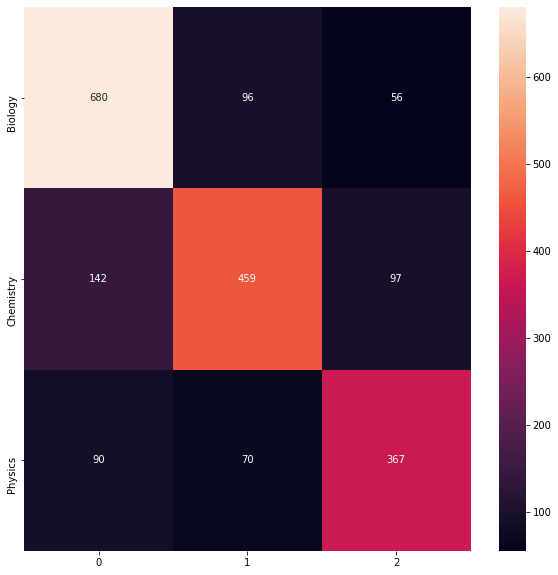

              precision    recall  f1-score   support

     Biology       0.75      0.82      0.78       832
   Chemistry       0.73      0.66      0.69       698
     Physics       0.71      0.70      0.70       527

    accuracy                           0.73      2057
   macro avg       0.73      0.72      0.72      2057
weighted avg       0.73      0.73      0.73      2057



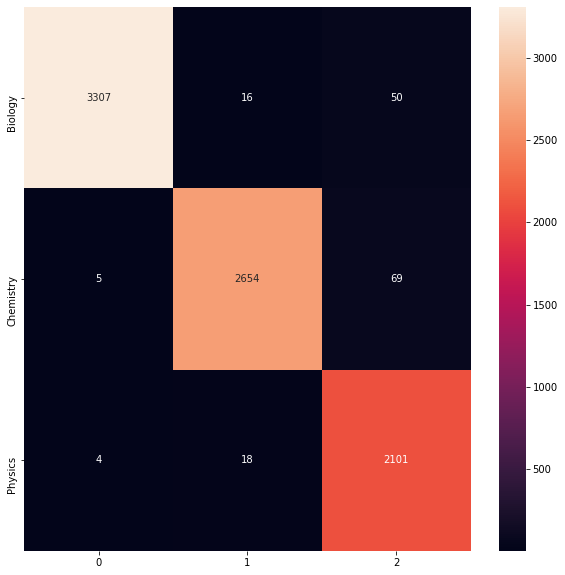

              precision    recall  f1-score   support

     Biology       1.00      0.98      0.99      3373
   Chemistry       0.99      0.97      0.98      2728
     Physics       0.95      0.99      0.97      2123

    accuracy                           0.98      8224
   macro avg       0.98      0.98      0.98      8224
weighted avg       0.98      0.98      0.98      8224



In [55]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_RF = train_model(RandomForestClassifier(n_estimators=200), x_train, y_train)
accuracy = get_accuracy(trained_clf_RF,x_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_RF,x_test, y_test)
get_report(trained_clf_RF,x_train, y_train)

## Predict sample

In [58]:
def predict(model,text):
    text = pd.Series(text)
    pred = model.predict(text)
    print(pred)

In [59]:
predict(trained_clf_RF, "behavior through space and time and the related entities of energy" )

['Physics']


In [60]:
predict(trained_clf_MLPClassifier, "behavior through space and time and the related entities of energy" )

['Physics']


In [61]:
predict(trained_clf_DT, "behavior through space and time and the related entities of energy" )

['Physics']


### Create model with neural network

In [113]:
text_train, text_test, label_train, label_test = train_test_split(full_data['Final_text'], Y, test_size=0.2, shuffle=True,  stratify=Y, random_state=42)

text_train.shape, text_test.shape, label_train.shape, label_test.shape

((8224,), (2057,), (8224,), (2057,))

In [114]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)

word_index = tokenizer.word_index
total_words = len(word_index)+1
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=100) 
padded_test = pad_sequences(sekuens_test, maxlen=100)

In [115]:
print(f'train datashape : {padded_train.shape}')
print(f'test datashape : {padded_test.shape}')
total_words

train datashape : (8224, 100)
test datashape : (2057, 100)


19630

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [117]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,output_dim=128,input_length=100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 128)          2512640   
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 4)                

In [118]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 91%!")
callbacks = myCallback()

In [119]:
import time
time_array = []

start_time = time.time()

# model fit
history = model.fit(padded_train, label_train, 
                    batch_size=256, 
                    epochs=30, 
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks],
                    validation_steps=5, steps_per_epoch=25)

print("--- %.2f minute ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/30
25/25 - 10s - loss: 1.2071 - accuracy: 0.3837 - val_loss: 1.0952 - val_accuracy: 0.4141 - 10s/epoch - 381ms/step
Epoch 2/30
25/25 - 9s - loss: 1.1168 - accuracy: 0.3850 - val_loss: 1.0903 - val_accuracy: 0.4141 - 9s/epoch - 346ms/step
Epoch 3/30
25/25 - 8s - loss: 1.0718 - accuracy: 0.4058 - val_loss: 1.0069 - val_accuracy: 0.4555 - 8s/epoch - 327ms/step
Epoch 4/30
25/25 - 8s - loss: 0.8859 - accuracy: 0.5724 - val_loss: 0.7901 - val_accuracy: 0.6281 - 8s/epoch - 331ms/step
Epoch 5/30
25/25 - 8s - loss: 0.5616 - accuracy: 0.7650 - val_loss: 0.7234 - val_accuracy: 0.6938 - 8s/epoch - 337ms/step
Epoch 6/30
25/25 - 8s - loss: 0.4016 - accuracy: 0.8426 - val_loss: 0.7270 - val_accuracy: 0.7195 - 8s/epoch - 326ms/step
Epoch 7/30
25/25 - 8s - loss: 0.3213 - accuracy: 0.8753 - val_loss: 0.7767 - val_accuracy: 0.7242 - 8s/epoch - 328ms/step
Epoch 8/30
25/25 - 8s - loss: 0.2765 - accuracy: 0.8973 - val_loss: 0.7566 - val_accuracy: 0.7133 - 8s/epoch - 326ms/step
Epoch 9/30
25/25 - 8s 

In [120]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.96
Training Loss: 0.09
Validation Accuracy: 0.72
Validation Loss: 1.81




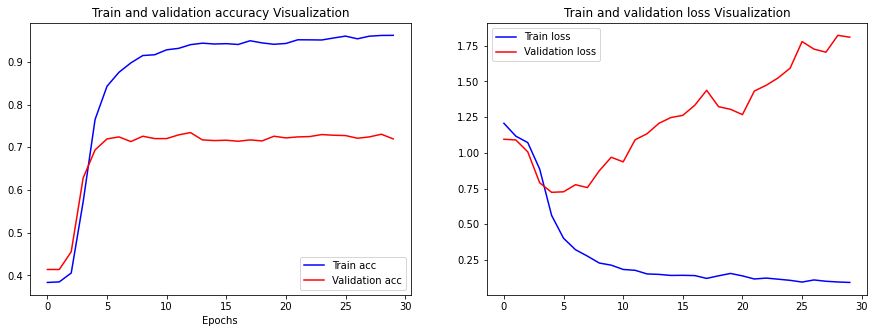

In [121]:
plot_history(history)